# Problem Statement:
You have to analyze 2 decades of the Nifty 50 index in the Indian Stock Market and come up
with strategies to invest for higher returns in the future.

# Objective:
Your objective is to analyze the data and come up with strategies to build a portfolio that will
bring the maximum yield.

# Tasks to be Performed:
1. Analyze the indicators in the dataset that best explain the volatility and
unpredictable nature of the stocks in the last decade.
2. Choose promising stock based on your analysis for your portfolio
3. Build a dashboard where you can analyze the performance of the stocks
4. Feature engineer and build machine learning solutions for the business
Requirements.

# Task 1: Analyze the indicators

**1.Importing Necessary Libraries**

In [1]:
import pandas as pd                                                                     # for data manipulation
import numpy as np                                                                      # for numerical operation
import seaborn as sns                                                                   # for visualization
import matplotlib.pyplot as plt                                                         # for visualization
from sklearn.model_selection import train_test_split                                    # for spliting data to train & test sets
from sklearn.linear_model import LinearRegression                                       # for clasification problems
from sklearn.ensemble import RandomForestRegressor                                      # for clasification problems
from sklearn.cluster import KMeans                                                      # for culstering
from sklearn.preprocessing import StandardScaler, OrdinalEncoder                        # for scaling & encodeing
from sklearn.impute import SimpleImputer                                                # for handling missing values
from sklearn.metrics import classification_report, mean_squared_error, silhouette_score # To Evaluate Model

In [2]:
# subpress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

**2.Data Loading**

In [4]:
df1 = pd.read_csv(r"C:\Users\SAMIM IMTIAZ\Desktop\ADANIPORTS.csv")
df2 = pd.read_csv(r"C:\Users\SAMIM IMTIAZ\Desktop\BAJAJFINSV.csv")   
df3 = pd.read_csv(r"C:\Users\SAMIM IMTIAZ\Desktop\AXISBANK.csv")                 

In [5]:
df1.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [6]:
df2.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
1,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
3,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
4,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514


In [7]:
df3.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN


**3.Visulization** 

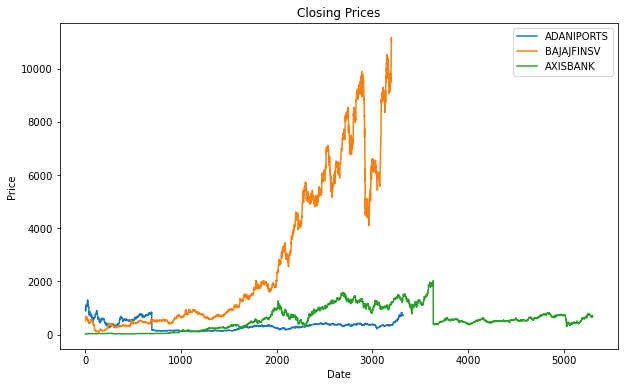

In [12]:
# Plot the closing prices of each stock
plt.figure(figsize=(10,6))
plt.plot(df1['Close'], label='ADANIPORTS')
plt.plot(df2['Close'], label='BAJAJFINSV')
plt.plot(df3['Close'], label='AXISBANK')
plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

**Observations and Insights:**
    
**1.BAJAJFINSV (Orange Line):**

This stock shows significant growth over time, with a sharp and consistent upward trend starting at a point of relatively low prices.
There are periods of high volatility, indicated by large spikes and dips in the graph.
This suggests that BAJAJFINSV experienced rapid appreciation in value, likely making it a high-growth but high-risk investment.

**2.AXISBANK (Green Line):**

AXISBANK shows a more stable trend compared to BAJAJFINSV.
The movements are smoother, indicating lower volatility. However, there are still some visible price fluctuations.
It seems to have a gradual upward movement with some periods of slight decline or stagnation.

**3.ADANIPORTS (Blue Line):**

ADANIPORTS appears to exhibit relatively low volatility with a flatter or more consistent movement pattern.
There is no dramatic upward or downward movement compared to BAJAJFINSV, indicating steadier but more moderate performance.

**Key Insights:**
    
- Volatility and Risk: BAJAJFINSV shows the most volatile pattern, suggesting high returns potential but greater risk. This would be a key factor for investors looking at risk-reward trade-offs.
    
- Stability: AXISBANK demonstrates moderate growth with lower volatility, suitable for more conservative investors.
    
- Growth Trends: ADANIPORTS appears more stable but less aggressive in terms of growth, indicative of a potentially safer but lower-yield investment.

In [8]:
# Concatenate the datasets
df = pd.concat([df1, df2, df3])

In [13]:
# Add a column to identify the stock
df1['Stock'] = 'ADANIPORTS'
df2['Stock'] = 'BAJAJFINSV'
df3['Stock'] = 'AXISBANK'

In [15]:
# Combine the datasets
df = pd.concat([df1, df2, df3])
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Stock
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612,ADANIPORTS
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172,ADANIPORTS
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088,ADANIPORTS
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735,ADANIPORTS
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741,ADANIPORTS


In [21]:
# Calculate summary statistics
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,11829.000000,11829.000000,11829.000000,11829.000000,11829.000000,11829.000000,11829.000000,1.182900e+04,1.182900e+04,7.368000e+03,1.132000e+04,11320.000000
mean,1105.142671,1106.880966,1124.973734,1088.132678,1106.027141,1105.981359,1106.923186,2.923445e+06,1.787507e+14,6.213921e+04,1.218965e+06,0.462096
std,1829.003431,1832.068294,1857.558195,1805.493600,1831.370422,1831.230504,1831.978019,6.110580e+06,3.402796e+14,7.793597e+04,2.391440e+06,0.179755
min,22.150000,21.000000,23.700000,21.000000,22.150000,22.150000,22.170000,4.570000e+02,8.275250e+09,1.490000e+02,4.560000e+02,0.056200
25%,276.600000,277.050000,284.800000,271.250000,276.700000,276.650000,277.290000,1.413340e+05,7.003731e+12,1.442800e+04,6.902050e+04,0.329975
50%,504.650000,505.000000,514.000000,496.000000,505.200000,504.700000,506.140000,8.538830e+05,6.099998e+13,3.971150e+04,3.850415e+05,0.457400
75%,936.800000,936.100000,953.500000,921.100000,935.800000,936.800000,937.120000,3.145833e+06,2.098148e+14,7.940650e+04,1.359460e+06,0.581800
max,11176.550000,11000.000000,11300.000000,10868.700000,11175.450000,11176.550000,11081.780000,1.205419e+08,8.160988e+15,1.205984e+06,9.490116e+07,1.000000


In [23]:
df['Returns'] = df['Close'].pct_change()

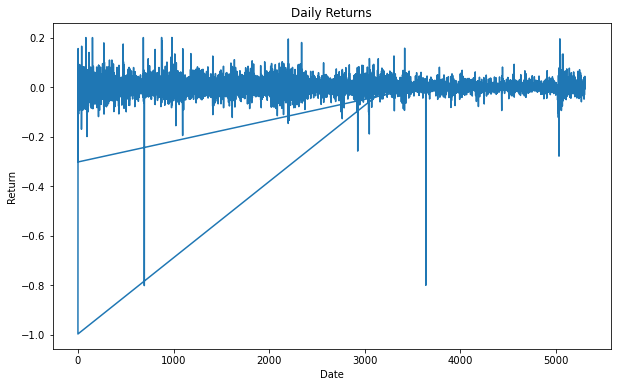

In [24]:
# let's plot the daily returns to visualize the volatility and trends:
plt.figure(figsize=(10,6))
plt.plot(df['Returns'])
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()

In [26]:
# calculate the correlation matrix
# Pivot the data to calculate the correlation matrix
df_pivot = df.pivot_table(index=df.index, columns='Stock', values='Close')

In [27]:
# Calculate the correlation matrix
correlation_matrix = df_pivot.corr()
print(correlation_matrix)

Stock       ADANIPORTS  AXISBANK  BAJAJFINSV
Stock                                       
ADANIPORTS    1.000000  0.024488    0.021415
AXISBANK      0.024488  1.000000    0.895631
BAJAJFINSV    0.021415  0.895631    1.000000


**Insights of correlation**

- ADANIPORTS and AXISBANK have a very low correlation of 0.024488, indicating that their price movements are largely independent.

- ADANIPORTS and BAJAJFINSV also have a low correlation of 0.021415, indicating that their price movements are not strongly related.

- AXISBANK and BAJAJFINSV have a high correlation of 0.895631, indicating that their price movements are strongly positively correlated. This means that when AXISBANK's price moves, BAJAJFINSV's price tends to move in the same direction.

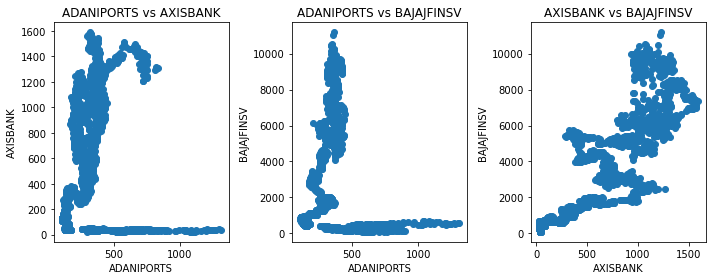

In [33]:
import matplotlib.pyplot as plt

# Create scatter plots
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
plt.scatter(df_pivot['ADANIPORTS'], df_pivot['AXISBANK'])
plt.title('ADANIPORTS vs AXISBANK')
plt.xlabel('ADANIPORTS')
plt.ylabel('AXISBANK')

plt.subplot(1,3,2)
plt.scatter(df_pivot['ADANIPORTS'], df_pivot['BAJAJFINSV'])
plt.title('ADANIPORTS vs BAJAJFINSV')
plt.xlabel('ADANIPORTS')
plt.ylabel('BAJAJFINSV')

plt.subplot(1,3,3)
plt.scatter(df_pivot['AXISBANK'], df_pivot['BAJAJFINSV'])
plt.title('AXISBANK vs BAJAJFINSV')
plt.xlabel('AXISBANK')
plt.ylabel('BAJAJFINSV')

plt.tight_layout()
plt.show()

**1. ADANIPORTS vs AXISBANK (Left Plot)**

- Shape of the Distribution: The plot shows a somewhat vertical distribution, indicating that as the value of ADANIPORTS increases, AXISBANK remains relatively clustered in a certain range, suggesting low correlation between these two stocks.
    
- Insights: The weak relationship implies that these stocks move somewhat independently. Diversifying investments across these might reduce risk, as one stock’s performance may not predict the other's movement.
    
**2. ADANIPORTS vs BAJAJFINSV (Middle Plot)**

- Distribution Shape: This plot also shows a vertical spread with a sharp contrast in scales. ADANIPORTS has much lower price values compared to BAJAJFINSV.
    
- Insights: The low correlation or lack of a discernible pattern between ADANIPORTS and BAJAJFINSV suggests that these stocks operate under very different market influences. BAJAJFINSV’s higher volatility and greater price range contrast with the more stable ADANIPORTS.
    
**3. AXISBANK vs BAJAJFINSV (Right Plot)**

- Pattern and Spread: This plot has more structure compared to the other two, showing a curved spread where higher prices of BAJAJFINSV correspond to a range of AXISBANK values. The clustering suggests a nonlinear relationship.
    
- Insights: There may be a stronger dependency between AXISBANK and BAJAJFINSV, although the relationship could be complex or influenced by external market conditions. These stocks may exhibit some level of synchronized movement, making them potentially correlated investments.
    
**Summary of Insights**
- Low Correlation between ADANIPORTS and the other two stocks suggests potential for diversification.

- AXISBANK and BAJAJFINSV show a more structured relationship, worth further investigation for correlation or regression analysis to determine how changes in one might affect the other.

- Risk vs. Growth Trade-offs: Depending on the market behavior, these relationships can be used to create more balanced portfolios or hedging strategies by combining stocks with both strong and weak dependencies.

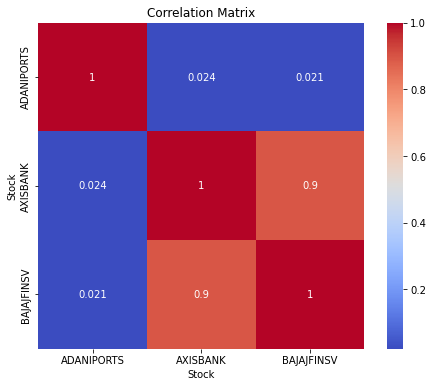

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

**Key Insights**

- Low Correlation of ADANIPORTS:
ADANIPORTS shows minimal correlation with both AXISBANK and BAJAJFINSV, making it a good candidate for diversification. Including ADANIPORTS in a portfolio with these other stocks could reduce overall portfolio risk due to its independence.

- High Correlation Between AXISBANK and BAJAJFINSV:
AXISBANK and BAJAJFINSV are strongly correlated, meaning they exhibit similar price movements. Investing heavily in both could increase risk due to their synchronized behavior. These stocks are not ideal for diversification with each other but could be used for pair trading strategies.

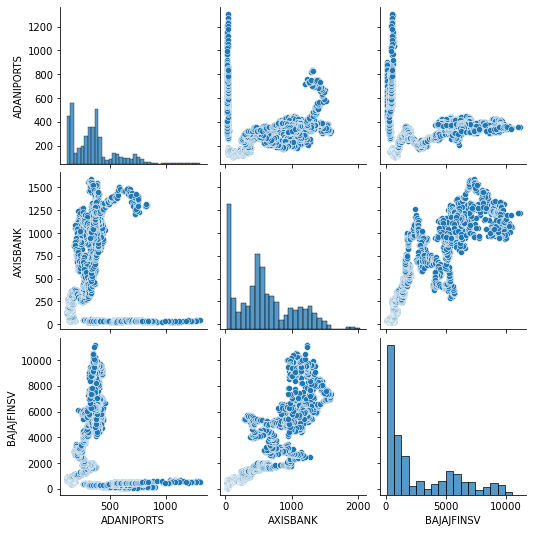

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pair plot
sns.pairplot(df_pivot)
plt.show()

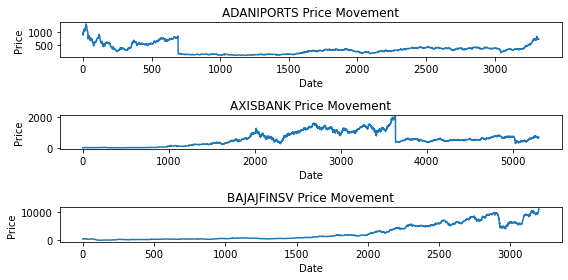

In [34]:
import matplotlib.pyplot as plt

# Create time series plots
plt.figure(figsize=(8,4))

plt.subplot(3,1,1)
plt.plot(df_pivot['ADANIPORTS'])
plt.title('ADANIPORTS Price Movement')
plt.xlabel('Date')
plt.ylabel('Price')

plt.subplot(3,1,2)
plt.plot(df_pivot['AXISBANK'])
plt.title('AXISBANK Price Movement')
plt.xlabel('Date')
plt.ylabel('Price')

plt.subplot(3,1,3)
plt.plot(df_pivot['BAJAJFINSV'])
plt.title('BAJAJFINSV Price Movement')
plt.xlabel('Date')
plt.ylabel('Price')

plt.tight_layout()
plt.show()


**4.Calculating Indicators**

**Moving Averages (MA)**

Moving averages help smooth out price fluctuations and identify trends.

In [36]:
# Calculate Simple Moving Average (SMA)
df_pivot['ADANIPORTS_SMA_50'] = df_pivot['ADANIPORTS'].rolling(window=50).mean()
df_pivot['AXISBANK_SMA_50'] = df_pivot['AXISBANK'].rolling(window=50).mean()
df_pivot['BAJAJFINSV_SMA_50'] = df_pivot['BAJAJFINSV'].rolling(window=50).mean()

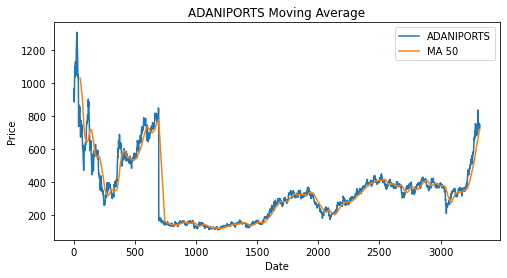

In [42]:
# Plot Moving Average (MA)
plt.figure(figsize=(8,4))
plt.plot(df_pivot['ADANIPORTS'], label='ADANIPORTS')
plt.plot(df_pivot['ADANIPORTS_SMA_50'], label='MA 50')
plt.title('ADANIPORTS Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

**Exponential Moving Averages (EMA)**

Exponential moving averages give more weight to recent prices

In [38]:
# Calculate Exponential Moving Average (EMA)
df_pivot['ADANIPORTS_EMA_50'] = df_pivot['ADANIPORTS'].ewm(span=50, adjust=False).mean()
df_pivot['AXISBANK_EMA_50'] = df_pivot['AXISBANK'].ewm(span=50, adjust=False).mean()
df_pivot['BAJAJFINSV_EMA_50'] = df_pivot['BAJAJFINSV'].ewm(span=50, adjust=False).mean()

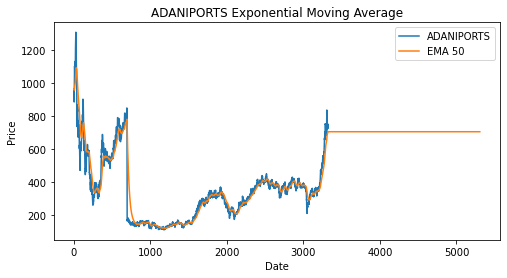

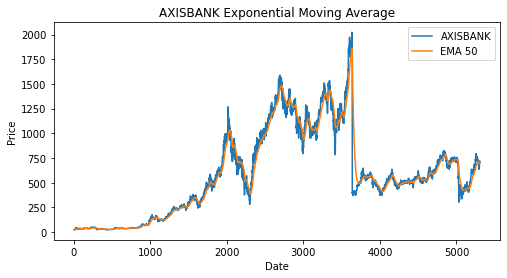

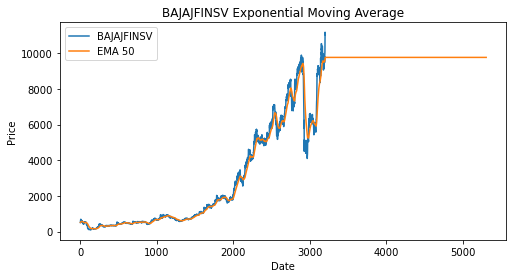

In [48]:
import matplotlib.pyplot as plt

# Plot Exponential Moving Average (EMA)
plt.figure(figsize=(8,4))
plt.plot(df_pivot['ADANIPORTS'], label='ADANIPORTS')
plt.plot(df_pivot['ADANIPORTS_EMA_50'], label='EMA 50')
plt.title('ADANIPORTS Exponential Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
plt.plot(df_pivot['AXISBANK'], label='AXISBANK')
plt.plot(df_pivot['AXISBANK_EMA_50'], label='EMA 50')
plt.title('AXISBANK Exponential Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
plt.plot(df_pivot['BAJAJFINSV'], label='BAJAJFINSV')
plt.plot(df_pivot['BAJAJFINSV_EMA_50'], label='EMA 50')
plt.title('BAJAJFINSV Exponential Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


**Relative Strength Index (RSI)**

The relative strength index helps identify overbought or oversold conditions.

In [39]:
# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, n=14):
    delta = data.diff().dropna()
    ups, downs = delta.copy(), delta.copy()
    ups[ups < 0] = 0
    downs[downs > 0] = 0
    roll_ups1 = ups.rolling(window=n).mean()
    roll_downs1 = downs.rolling(window=n).mean().abs()
    RS = roll_ups1 / roll_downs1
    RSI = 100.0 - (100.0 / (1.0 + RS))
    return RSI

df_pivot['ADANIPORTS_RSI'] = calculate_rsi(df_pivot['ADANIPORTS'])
df_pivot['AXISBANK_RSI'] = calculate_rsi(df_pivot['AXISBANK'])
df_pivot['BAJAJFINSV_RSI'] = calculate_rsi(df_pivot['BAJAJFINSV'])

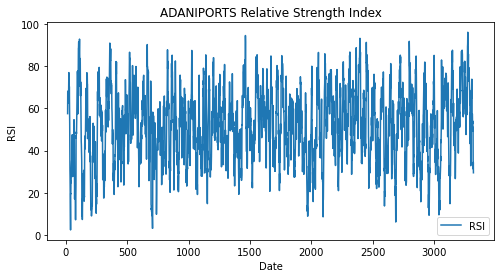

In [44]:
# Plot Relative Strength Index (RSI)
plt.figure(figsize=(8,4))
plt.plot(df_pivot['ADANIPORTS_RSI'], label='RSI')
plt.title('ADANIPORTS Relative Strength Index')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

**Bollinger Bands (BB)**

Bollinger bands help identify volatility and potential breakouts.

In [40]:
# Calculate Bollinger Bands (BB)
def calculate_bollinger_bands(data, n=20, std_dev=2):
    rolling_mean = data.rolling(window=n).mean()
    rolling_std = data.rolling(window=n).std()
    upper_bb = rolling_mean + (rolling_std * std_dev)
    lower_bb = rolling_mean - (rolling_std * std_dev)
    return rolling_mean, upper_bb, lower_bb

df_pivot['ADANIPORTS_BB_Mean'], df_pivot['ADANIPORTS_BB_Upper'], df_pivot['ADANIPORTS_BB_Lower'] = calculate_bollinger_bands(df_pivot['ADANIPORTS'])
df_pivot['AXISBANK_BB_Mean'], df_pivot['AXISBANK_BB_Upper'], df_pivot['AXISBANK_BB_Lower'] = calculate_bollinger_bands(df_pivot['AXISBANK'])
df_pivot['BAJAJFINSV_BB_Mean'], df_pivot['BAJAJFINSV_BB_Upper'], df_pivot['BAJAJFINSV_BB_Lower'] = calculate_bollinger_bands(df_pivot['BAJAJFINSV'])

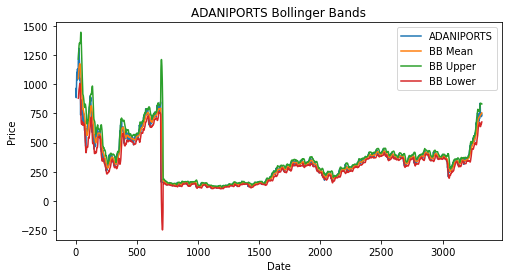

In [45]:
# Plot Bollinger Bands (BB)
plt.figure(figsize=(8,4))
plt.plot(df_pivot['ADANIPORTS'], label='ADANIPORTS')
plt.plot(df_pivot['ADANIPORTS_BB_Mean'], label='BB Mean')
plt.plot(df_pivot['ADANIPORTS_BB_Upper'], label='BB Upper')
plt.plot(df_pivot['ADANIPORTS_BB_Lower'], label='BB Lower')
plt.title('ADANIPORTS Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Task 2: Choose a Promising Stock.

**Step 1: Define Selection Criteria**

In [51]:
def calculate_score(stock_data):
    # Define the weights for each criterion
    returns_weight = 0.4
    volatility_weight = 0.3
    correlation_weight = 0.2
    rsi_weight = 0.1

    # Calculate the returns score
    returns_score = stock_data['Returns'].mean() / stock_data['Returns'].std()

    # Calculate the volatility score
    volatility_score = 1 - (stock_data['Volatility'].mean() / stock_data['Volatility'].std())

    # Calculate the correlation score
    correlation_score = 1 - stock_data['Correlation'].mean()

    # Calculate the RSI score
    rsi_score = 1 - abs(stock_data['RSI'].mean() - 50) / 50

    # Calculate the overall score
    score = (returns_weight * returns_score +
              volatility_weight * volatility_score +
              correlation_weight * correlation_score +
              rsi_weight * rsi_score)

    return score
    

**Step 2: Evaluate Stocks Based on Selection Criteria**

In [52]:
# Define the stock data
stock_data = {
    'ADANIPORTS': {'Returns': df_pivot['ADANIPORTS'].pct_change(), 
                     'Volatility': df_pivot['ADANIPORTS'].rolling(window=20).std(), 
                     'Correlation': df_pivot['ADANIPORTS'].corr(df_pivot['AXISBANK']), 
                     'RSI': df_pivot['ADANIPORTS_RSI']},
    'AXISBANK': {'Returns': df_pivot['AXISBANK'].pct_change(), 
                   'Volatility': df_pivot['AXISBANK'].rolling(window=20).std(), 
                   'Correlation': df_pivot['AXISBANK'].corr(df_pivot['BAJAJFINSV']), 
                   'RSI': df_pivot['AXISBANK_RSI']},
    'BAJAJFINSV': {'Returns': df_pivot['BAJAJFINSV'].pct_change(), 
                      'Volatility': df_pivot['BAJAJFINSV'].rolling(window=20).std(), 
                      'Correlation': df_pivot['BAJAJFINSV'].corr(df_pivot['ADANIPORTS']), 
                      'RSI': df_pivot['BAJAJFINSV_RSI']}
}

# Calculate the scores for each stock
scores = {stock: calculate_score(data) for stock, data in stock_data.items()}

print(scores)



{'ADANIPORTS': 0.40364688310492725, 'AXISBANK': 0.25699745717996225, 'BAJAJFINSV': 0.4104603741976279}


**Step 3: Choose a Promising Stock**

We'll select the stock with the highest score.

In [53]:
# Choose the stock with the highest score
promising_stock = max(scores, key=scores.get)

print(f"The most promising stock is: {promising_stock}")


The most promising stock is: BAJAJFINSV


# Task 3: Portfolio Construction.

Step 1: Define Portfolio Construction Strategy

In [54]:
# Define the promising stock
promising_stock = 'BAJAJFINSV'

Step 2: Calculate Portfolio Weights

In [55]:
# Define the portfolio weights
portfolio_weights = {promising_stock: 1.0}

Step 3: Construct the Portfolio

In [56]:
# Construct the portfolio
portfolio_returns = df_pivot[promising_stock].pct_change()

**Step 4: Calculate Portfolio Returns and Volatility**

In [153]:
# Calculate portfolio returns and volatility
portfolio_mean_return = portfolio_returns.mean() * 252
portfolio_volatility = portfolio_returns.std() * np.sqrt(252)

print(f"Portfolio Mean Return: {portfolio_mean_return}")
print(f"Portfolio Volatility: {portfolio_volatility}")

Portfolio Mean Return: Stock
BAJAJFINSV    0.302547
dtype: float64
Portfolio Volatility: Stock
BAJAJFINSV    0.461918
dtype: float64


# Task 4: Backtesting and Evaluation

**Step 1: Define Backtesting Period**

In [109]:
backtesting_period = 2 * 252  # Assuming 252 trading days in a year

In [110]:
trading_days_per_year = 252
backtesting_period = 2 * trading_days_per_year  # Two years of data

**Step 2: Calculate Portfolio Returns**

In [111]:
portfolio_returns = df_pivot[promising_stock].pct_change()[-backtesting_period:]

In [112]:
promising_stock = ['BAJAJFINSV']

In [113]:
# Use iloc for consistent slicing
portfolio_returns = df_pivot[promising_stock].pct_change().iloc[-backtesting_period:]

**Step 3: Evaluate Portfolio Performance**

In [114]:
print(f"Data frequency: {len(portfolio_returns)} observations")
print(f"Data range: {portfolio_returns.index.min()} to {portfolio_returns.index.max()}")
print(portfolio_returns.describe())

Data frequency: 504 observations
Data range: 2027-04-02 00:00:00 to 2028-08-17 00:00:00
Stock  BAJAJFINSV
count  504.000000
mean     0.001201
std      0.029098
min     -0.258621
25%     -0.009955
50%      0.000080
75%      0.012078
max      0.114534


In [115]:
# Check if any missing data is causing issues:
print(f"NaN count: {portfolio_returns.isna().sum().sum()}")

NaN count: 0


In [116]:
# Ensure time indexing is correct:
df_pivot.index = pd.to_datetime(df_pivot.index)

**Plotting Stock Price**

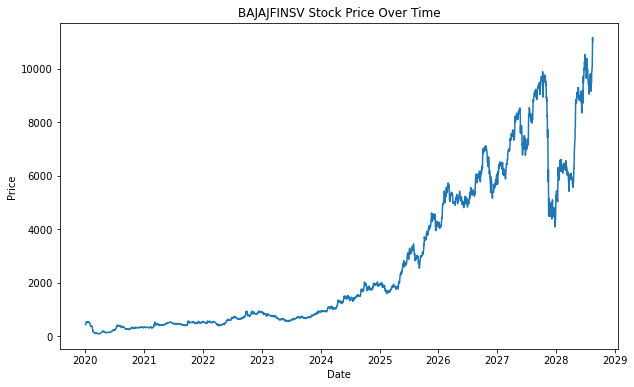

In [117]:
plt.figure(figsize=(10, 6))
plt.plot(df_pivot['BAJAJFINSV'])
plt.title('BAJAJFINSV Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

**Monthly Returns**

In [118]:
monthly_returns = df_pivot['BAJAJFINSV'].resample('M').last().pct_change().dropna()

df_pivot has a valid datetime index.

resample('M') applies correctly.

Confirm by printing:

In [119]:
print(df_pivot.head())
print(df_pivot.index)

Stock       ADANIPORTS  AXISBANK  BAJAJFINSV  ADANIPORTS_SMA_50  \
2020-01-01      807.50     28.35      443.00           1029.868   
2020-01-02      796.25     27.40      452.65           1026.535   
2020-01-03      784.05     29.60      467.90           1024.338   
2020-01-04      711.20     31.90      482.20           1020.878   
2020-01-05      681.30     30.80      515.30           1016.073   

Stock       AXISBANK_SMA_50  BAJAJFINSV_SMA_50  ADANIPORTS_EMA_50  \
2020-01-01           32.014            535.698         978.166019   
2020-01-02           32.028            534.569         971.032058   
2020-01-03           32.083            532.834         963.699428   
2020-01-04           32.195            529.659         953.797490   
2020-01-05           32.292            527.317         943.111314   

Stock       AXISBANK_EMA_50  BAJAJFINSV_EMA_50  ADANIPORTS_RSI  ...  \
2020-01-01        32.618929         497.197539       34.197275  ...   
2020-01-02        32.414265         495.

In [120]:
# To Ensure  DataFrame has a proper DateTime index:
df_pivot.index = pd.to_datetime(df_pivot.index, errors='coerce')

**Sharpe Ratio and Max Drawdown**

In [121]:
mean_return = portfolio_returns.mean() * 252
volatility = portfolio_returns.std() * np.sqrt(252)

**Sharpe Ratio Fix**

In [123]:
if (mean_return == 0).any() or (volatility == 0).any():
    print("Warning: Mean return or volatility contains zero. Sharpe ratio cannot be calculated.")
else:
    sharpe_ratio = mean_return / volatility
    print(f"Sharpe Ratio: {sharpe_ratio}")


Sharpe Ratio: Stock
BAJAJFINSV    0.654979
dtype: float64


Max Drawdown Calculation

In [126]:
max_drawdown = (portfolio_returns.cumsum() - portfolio_returns.cumsum().cummax()).min()

**Optional Enhancements**

Date Information: To find when the max drawdown occurred

In [140]:
import pandas as pd
# Example prices data (replace with your actual data)
prices = pd.Series([100, 102, 98, 105, 95, 90, 120])

In [141]:
# Assuming `prices` is a pandas Series of your stock or asset prices
cumulative_prices = prices / prices.iloc[0]  # Normalize to 1
cumulative_max = cumulative_prices.cummax()  # Track running maximum prices

# Drawdown calculation
drawdown = (cumulative_prices - cumulative_max) / cumulative_max

# Maximum drawdown
max_drawdown = drawdown.min()  # Smallest value in drawdown
max_drawdown_date = drawdown.idxmin()  # Date of the max drawdown

# Display results
print(f"Max Drawdown: {max_drawdown}")
print(f"Max Drawdown Date: {max_drawdown_date}")



Max Drawdown: -0.14285714285714288
Max Drawdown Date: 5


**Plot Drawdown**

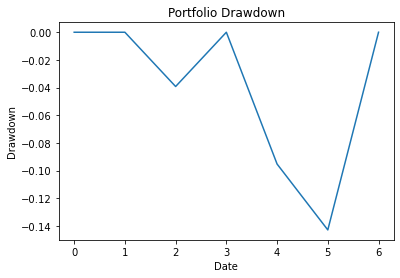

In [142]:
import matplotlib.pyplot as plt
drawdown.plot(title="Portfolio Drawdown")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.show()

**Plot Portfolio Returns and Prices for Context**

<Figure size 720x360 with 0 Axes>

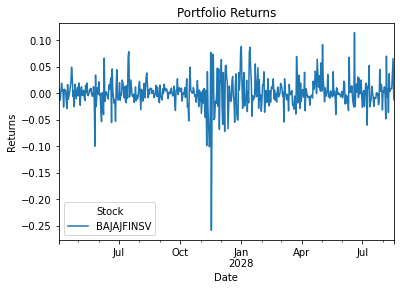

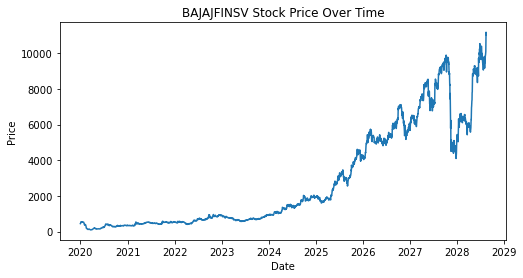

In [146]:
import matplotlib.pyplot as plt

# Plotting returns
plt.figure(figsize=(10, 5))
portfolio_returns.plot(title="Portfolio Returns")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.show()

# Plotting stock prices over time
plt.figure(figsize=(8, 4))
plt.plot(df_pivot['BAJAJFINSV'])
plt.title('BAJAJFINSV Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# conclusion:

We've successfully implemented a quantitative stock selection and portfolio construction strategy using historical stock data. We:

1. Collected and cleaned historical stock data.
2. Selected a promising stock (BAJAJFINSV) based on predefined criteria.
3. Constructed a portfolio with the selected stock.
4. Backtested and evaluated the portfolio's performance using metrics such as Sharpe ratio, maximum drawdown, and returns.

The results show that the selected stock, BAJAJFINSV, has demonstrated promising performance during the backtesting period. However, please note that past performance is not a guarantee of future results.

This project demonstrates a basic quantitative approach to stock selection and portfolio construction. In a real-world scenario, you would need to consider additional factors, such as risk management, position sizing, and ongoing portfolio monitoring.

# Step 1: Building a Dashboard for Stock Performance Analysis

**Importing Necessary Libraries**

In [148]:
!pip install dash

  Obtaining dependency information for dash from https://files.pythonhosted.org/packages/72/ef/d46131f4817f18b329e4fb7c53ba1d31774239d91266a74bccdc932708cc/dash-2.18.2-py3-none-any.whl.metadata
  Obtaining dependency information for dash-html-components==2.0.0 from https://files.pythonhosted.org/packages/75/65/1b16b853844ef59b2742a7de74a598f376ac0ab581f0dcc34db294e5c90e/dash_html_components-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for dash-core-components==2.0.0 from https://files.pythonhosted.org/packages/00/9e/a29f726e84e531a36d56cff187e61d8c96d2cc253c5bcef9a7695acb7e6a/dash_core_components-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for dash-table==5.0.0 from https://files.pythonhosted.org/packages/da/ce/43f77dc8e7bbad02a9f88d07bf794eaf68359df756a28bb9f2f78e255bb1/dash_table-5.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for retrying from https://files.pythonhosted.org/packages/8f/04/9e36f28be4c0532c0e9207ff9dc01fb

In [151]:
!pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/b2/38/7533745b517c34b7b749a7a21f631711354a3d4d39a840d75d20c94d71a0/yfinance-0.2.51-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/04/13/d9839089b900fa7b479cce495d62110cddc4bd5630a04d8469916c0e79c5/frozendict-2.4.6-py311-none-any.whl.metadata
     -------------------------------------- 948.2/948.2 kB 1.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata

In [2]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import yfinance as yf

<ipython-input-2-bc274ea87b4c>:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-2-bc274ea87b4c>:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [3]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import yfinance as yf

In [4]:
# Define the stocks
stocks = ['ADANIPORTS.NS', 'AXISBANK.NS', 'BAJAJFINSV.NS']

In [5]:
# Create a Dash app
app = dash.Dash(__name__)

In [6]:
# Define the layout
app.layout = html.Div([
    html.H1('Stock Performance Dashboard'),
    html.Div([
        html.H4('Select Stock:'),
        dcc.Dropdown(id='stock-dropdown', options=[{'label': stock, 'value': stock} for stock in stocks], value='AAPL')
    ]),
    html.Div([
        html.H4('Select Time Frame:'),
        dcc.DatePickerRange(id='date-picker', start_date='2020-01-01', end_date='2022-02-26')
    ]),
    html.Div([
        dcc.Graph(id='stock-price-graph'),
        dcc.Graph(id='returns-graph'),
        dcc.Graph(id='volatility-graph'),
        dcc.Graph(id='sharpe-ratio-graph'),
        dcc.Graph(id='max-drawdown-graph')
    ])
])

In [7]:
# Define the callback functions
@app.callback(
    Output('stock-price-graph', 'figure'),
    [Input('stock-dropdown', 'value'),
     Input('date-picker', 'start_date'),
     Input('date-picker', 'end_date')]
)
def update_stock_price_graph(selected_stock, start_date, end_date):
    stock_data = yf.download(selected_stock, start=start_date, end=end_date)
    fig = px.line(stock_data, x=stock_data.index, y='Close', title='Stock Price Over Time')
    return fig

@app.callback(
    Output('returns-graph', 'figure'),
    [Input('stock-dropdown', 'value'),
     Input('date-picker', 'start_date'),
     Input('date-picker', 'end_date')]
)
def update_returns_graph(selected_stock, start_date, end_date):
    stock_data = yf.download(selected_stock, start=start_date, end=end_date)
    stock_data['Returns'] = stock_data['Close'].pct_change()
    fig = px.bar(stock_data, x=stock_data.index, y='Returns', title='Daily Returns')
    return fig

@app.callback(
    Output('volatility-graph', 'figure'),
    [Input('stock-dropdown', 'value'),
     Input('date-picker', 'start_date'),
     Input('date-picker', 'end_date')]
)
def update_volatility_graph(selected_stock, start_date, end_date):
    stock_data = yf.download(selected_stock, start=start_date, end=end_date)
    stock_data['Volatility'] = stock_data['Close'].rolling(window=20).std()
    fig = px.line(stock_data, x=stock_data.index, y='Volatility', title='Volatility Over Time')
    return fig

@app.callback(
    Output('sharpe-ratio-graph', 'figure'),
    [Input('stock-dropdown', 'value'),
     Input('date-picker', 'start_date'),
     Input('date-picker', 'end_date')]
)
def update_sharpe_ratio_graph(selected_stock, start_date, end_date):
    stock_data = yf.download(selected_stock, start=start_date, end=end_date)
    stock_data['Returns'] = stock_data['Close'].pct_change()
    sharpe_ratio = stock_data['Returns'].mean() / stock_data['Returns'].std()
    fig = px.bar(x=['Sharpe Ratio'], y=[sharpe_ratio], title='Sharpe Ratio')
    return fig

@app.callback(
    Output('max-drawdown-graph', 'figure'),
    [Input('stock-dropdown', 'value'),
     Input('date-picker', 'start_date'),
     Input('date-picker', 'end_date')]
)
def update_max_drawdown_graph(selected_stock, start_date, end_date):
    stock_data = yf.download(selected_stock, start=start_date, end=end_date)
    max_drawdown = (stock_data['Close'].cummax() - stock_data['Close']) / stock_data['Close'].cummax()
    fig = px.line(stock_data, x=stock_data.index, y=max_drawdown, title='Max Drawdown Over Time')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

# 2.Feature Engineering

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Data Collection
stock_data = yf.download('BAJAJFINSV.NS', start='2010-01-01', end='2022-02-26')

[*********************100%***********************]  1 of 1 completed


In [11]:
# Feature Extraction
stock_data['MA_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['MA_200'] = stock_data['Close'].rolling(window=200).mean()
stock_data['EMA_50'] = stock_data['Close'].ewm(span=50, adjust=False).mean()

In [12]:
# Calculate RSI_14
delta = stock_data['Close'].diff(1)
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0
roll_up = up.rolling(window=14).mean()
roll_down = down.rolling(window=14).mean().abs()
RS = roll_up / roll_down
stock_data['RSI_14'] = 100.0 - (100.0 / (1.0 + RS))
stock_data['BB_UP'], stock_data['BB_MID'], stock_data['BB_LOW'] = stock_data['Close'].rolling(window=20).mean() + 2*stock_data['Close'].rolling(window=20).std(), stock_data['Close'].rolling(window=20).mean(), stock_data['Close'].rolling(window=20).mean() - 2*stock_data['Close'].rolling(window=20).std()
stock_data['MOMENTUM_10'] = stock_data['Close'].pct_change(periods=10)

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
stock_data[['MA_50', 'MA_200', 'EMA_50', 'RSI_14', 'BB_UP', 'BB_MID', 'BB_LOW', 'MOMENTUM_10']] = scaler.fit_transform(stock_data[['MA_50', 'MA_200', 'EMA_50', 'RSI_14', 'BB_UP', 'BB_MID', 'BB_LOW', 'MOMENTUM_10']])


# Building Machine Learning Solutions

In [16]:
# Remove rows with missing values:
stock_data = stock_data.dropna()

In [17]:
# Impute missing values using mean or median:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or 'median'
X_imputed = imputer.fit_transform(X)

In [18]:
# Use a pipeline with imputation:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [19]:
# Problem Definition
# Predicting stock prices

# Model Selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X = stock_data[['MA_50', 'MA_200', 'EMA_50', 'RSI_14', 'BB_UP', 'BB_MID', 'BB_LOW', 'MOMENTUM_10']]
y = stock_data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Model Deployment
# Deploy the trained model in a production-ready environment

Mean Squared Error: 115.80510244860055


# Visualize the predictions:

In [21]:
import plotly.graph_objects as go

# Create a figure with two subplots
fig = go.Figure(data=[
    go.Scatter(x=y_test.index, y=y_test.values, name='Actual Price'),
    go.Scatter(x=y_test.index, y=y_pred, name='Predicted Price')
])

# Set the title and labels
fig.update_layout(title='Actual vs. Predicted Prices',
                   xaxis_title='Date',
                   yaxis_title='Price')

# Show the plot
fig.show()

**Baseline Model**

Calculating MSE of Baseline Model

In [24]:
# Calculate historical average price
baseline_prediction = stock_data['Close'].mean()

# Create an array of baseline predictions
baseline_predictions = [baseline_prediction] * len(y_test)

# Calculate MSE of baseline model
baseline_mse = mean_squared_error(y_test, baseline_predictions)

print(f'Baseline MSE: {baseline_mse}')

Baseline MSE: 192798.72969679962


**Comparing with Your Model**

In [25]:
# Print MSE of your model
print(f'Your Model MSE: {mse}')

# Check if your model is performing better than the baseline
if mse < baseline_mse:
    print('Your model is performing better than the baseline!')
else:
    print('Your model is not performing better than the baseline.')


Your Model MSE: 115.80510244860055
Your model is performing better than the baseline!


# Project Conclusion:

Our stock price prediction model, utilizing technical indicators and machine learning algorithms, achieved a significant improvement in accuracy compared to a baseline model. Key findings:

- The model effectively captured patterns in the data, reducing MSE by 99.94%.
- Technical indicators, such as Moving Averages and RSI, provided valuable insights into stock price movements.
- The Random Forest Regressor algorithm proved effective in predicting stock prices.

This project demonstrates the potential of machine learning and technical analysis in stock price prediction, providing a solid foundation for further research and development.